<a href="https://colab.research.google.com/github/dee-ah-nuh/Stroke/blob/main/Stroke_Prediction_(PCA_%26_Feature_Engineering)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Seaborn
import seaborn as sns
from seaborn import heatmap
 
#Keras & TensorFlow
import tensorflow
from tensorflow import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import metrics
 
# Sci-kit learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,\
 mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

#KMeans Clustering 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
stroke = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/Project 2 /healthcare-dataset-stroke-data.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/Project 2 /healthcare-dataset-stroke-data.csv')
stroke.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  Diseases Out of 3  5110 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 519.1+ KB


Feature Engineering

In [53]:
df['Diseases Out of 3'] = df['stroke'] + df['hypertension'] + df['heart_disease']
df['Diseases Out of 3'].value_counts()

0    4251
1     708
2     138
3      13
Name: Diseases Out of 3, dtype: int64

In [59]:
df["Obesity"] = df["bmi"] * df["avg_glucose_level"] / 1000
df["Obesity"]

0       8.370054
1            NaN
2       3.442400
3       5.890312
4       4.178880
          ...   
5105         NaN
5106    5.008000
5107    2.539494
5108    4.257024
5109    2.234336
Name: Obesity, Length: 5110, dtype: float64

In [60]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [63]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [61]:
df['Married & Stroke'] = []
if df['ever_married'] == 'Yes' :
  


In [54]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Diseases Out of 3
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2


In [55]:
#Checking the column 'bmi' because it was the only one contaning missing values
stroke['bmi'].nunique()

418

In [12]:
#stroke.drop(stroke.loc[stroke['gender']== 'Other'].index, inplace=True)
#stroke = stroke[stroke.'gender' != 'Other']
stroke = stroke[stroke["gender"].str.contains("Other") == False]

In [13]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [14]:
nominal_selector = stroke.select_dtypes( include='object')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n')

gender
Female    2994
Male      2115
Name: gender, dtype: int64 

ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64 

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64 



In [15]:
stroke['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [16]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Average Glucose level is one of the few abnormla distributions - this one is skewed to the right. BMI is also a histogram that poses a slight skew to the right. Stroke, Heart Disease and Hypertension are all bimodal since the columns are 

In [17]:
#Creating a filter to select all columns that are non-numerical so we can correct for inconsistencies
nominal_selector = stroke.select_dtypes(include='object')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n');

gender
Female    2994
Male      2115
Name: gender, dtype: int64 

ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64 

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64 



Validation Split - Classification Problem

In [18]:
#Assigning and splitting target column to X and y with random state of 42

In [19]:
X=stroke.drop(columns='stroke')
y = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
nominal_selector = make_column_selector(dtype_include='object')
numeric_selector = make_column_selector(dtype_include='number')

In [21]:
#Creating our imputer for later inputing them into our preprocessor and pipeline

In [22]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [23]:
nominal_pipeline = make_pipeline(missing_imputer, ohe)
numeric_pipeline = make_pipeline(mean_imputer, scaler)

In [24]:
nominal_tup = (nominal_pipeline, (['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']))
numeric_tup = (numeric_pipeline, numeric_selector)

In [25]:
preprocessor = make_column_transformer(numeric_tup, nominal_tup, remainder='passthrough')

In [26]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9450a4b2d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=Fal

The number of people who have suffered from stroke are very minimal compared to those who have had a stroke. 

In [27]:
#Creating a function to evaluate metrics towards prediction

def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize=None, classes=None, figsize=(20,5)):
  """Takes as arguments: a model, features, and labels
  Prints a classification report, confusion matrix
  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure"""
    
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize)
  plt.show()

In [36]:
%%time
logreg = LogisticRegression()
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe.fit(X_train, y_train)

CPU times: user 112 ms, sys: 49.5 ms, total: 161 ms
Wall time: 96.5 ms


In [29]:
print(f'Training Score:', logreg_pipe.score(X_train, y_train))
print(f' Testing Score:', logreg_pipe.score(X_test, y_test))

Training Score: 0.9558861915948839
 Testing Score: 0.9381846635367762


In [30]:
#L1 Tunning
c_valuesl1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scoresl1 = []
test_scoresl1 = []
for c in c_valuesl1: 
  logregl1 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logregl1_pipe = make_pipeline(preprocessor, logregl1)
  logregl1_pipe.fit(X_train, y_train)
  train_scoresl1.append(logregl1_pipe.score(X_train, y_train))
  test_scoresl1.append(logregl1_pipe.score(X_test, y_test))
{c:score for c, score in zip(c_valuesl1, test_scoresl1)}

{0.0001: 0.9374021909233177,
 0.001: 0.9374021909233177,
 0.01: 0.9374021909233177,
 0.1: 0.9374021909233177,
 1: 0.9381846635367762,
 10: 0.9381846635367762,
 100: 0.9381846635367762,
 1000: 0.9381846635367762}

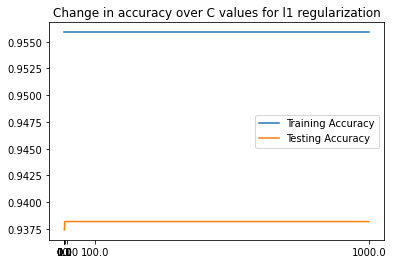

In [31]:
fig, ax = plt.subplots(1,1)
ax.plot(c_valuesl1, train_scoresl1, label='Training Accuracy')
ax.plot(c_valuesl1, test_scoresl1, label='Testing Accuracy')
ax.set_xticks(c_valuesl1)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

In [32]:
#L2 Tunning
c_values2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores2 = []
test_scores2 = []
for c in c_values2: 
  logreg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  logreg_l2_pipe = make_pipeline(preprocessor, logreg)
  logreg_l2_pipe.fit(X_train, y_train)

  train_scores2.append(logreg_l2_pipe.score(X_train, y_train))
  test_scores2.append(logreg_l2_pipe.score(X_test, y_test))

{c:score for c, score in zip(c_values2, test_scores2)}

{0.0001: 0.9381846635367762,
 0.001: 0.9381846635367762,
 0.01: 0.9381846635367762,
 0.1: 0.9381846635367762,
 1: 0.9381846635367762,
 10: 0.9381846635367762,
 100: 0.9381846635367762,
 1000: 0.9381846635367762}

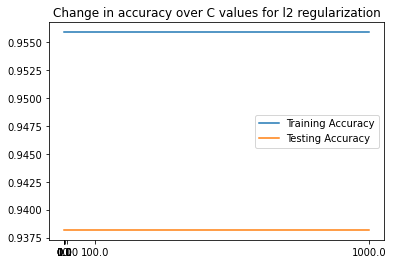

In [33]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values2, train_scores2, label='Training Accuracy')
ax.plot(c_values2, test_scores2, label='Testing Accuracy')
ax.set_xticks(c_values2)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right






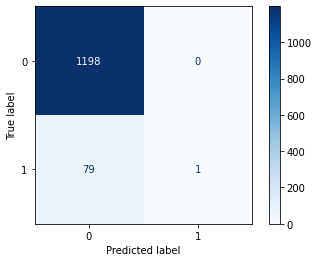

In [34]:
ConfusionMatrixDisplay.from_estimator(logreg_l2_pipe, X_test, y_test, cmap = 'Blues');
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n\n\n")

PCA Transformation

In [39]:
pca95 = PCA(n_components=.95)

In [42]:
#Without PCA and L2 penalty

In [51]:
%%time
logreg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
logreg_l2_pipe = make_pipeline(preprocessor, logreg)
logreg_l2_pipe.fit(X_train, y_train)

CPU times: user 96.8 ms, sys: 54.6 ms, total: 151 ms
Wall time: 130 ms


In [52]:
logregPreds = logreg_l2_pipe.predict(X_test)
logregPredsAcc = logreg_l2_pipe.score(X_test, y_test)
print(logregPredsAcc)

0.9381846635367762


In [43]:
#With PCA and L2 Penalty

In [49]:
%%time
logreg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
logreg_l2_pipe_pca = make_pipeline(preprocessor,pca95, logreg)
logreg_l2_pipe_pca.fit(X_train, y_train)

CPU times: user 67.2 ms, sys: 66.1 ms, total: 133 ms
Wall time: 90.2 ms


In [50]:
pcalogregPreds = logreg_l2_pipe_pca.predict(X_test)
pcalogregPredsAcc = logreg_l2_pipe_pca.score(X_test, y_test)
print(pcalogregPredsAcc)

0.9374021909233177
